**Load and read dataset**

In [ ]:
#Install google colab to read dataset
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Load dataset
import pandas as pd

root_path = 'gdrive/My Drive/'
dataset = pd.read_csv(root_path+'Project_Output_20210831.csv',encoding='latin-1')


**Data transformation and normalization**

In [ ]:
dataset.head()

,CODEMAMROT,Boroughs,Year,Month,Sum_NOMBRE_UNI,Sum_Fire_Incident,Count_Incident,Count_Incident_1,Count_Crime,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT
0,66007,Montréal-Est,2015,2,51,0,32,29,11,3,1178,1511,68.868139,315682,127482
1,66007,Montréal-Est,2015,3,57,0,29,32,6,11,1178,1511,68.951473,315682,127482
2,66007,Montréal-Est,2015,4,69,2,35,29,7,6,1178,1511,69.034806,315682,127482
3,66007,Montréal-Est,2015,5,97,7,37,35,17,7,1178,1511,69.118139,315682,127482
4,66007,Montréal-Est,2015,6,71,3,34,37,3,17,1178,1511,69.201473,315682,127482


In [ ]:
# Extract August 2021 as the dataset used for prediction
dataset_Predict = dataset[(dataset['Year'] == 2021)&(dataset['Month'] == 8)]

In [ ]:
dataset_Predict.shape

(34, 15)

In [ ]:
dataset_Predict.head()

,CODEMAMROT,Boroughs,Year,Month,Sum_NOMBRE_UNI,Sum_Fire_Incident,Count_Incident,Count_Incident_1,Count_Crime,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT
78,66007,Montréal-Est,2021,8,6,0,3,34,0,5,1178,1511,75.368139,315682,127482
157,66032,Westmount,2021,8,9,0,7,94,0,13,8563,7973,96.838606,1794112,5523794
236,66047,Montréal-Ouest,2021,8,1,0,1,13,0,4,2428,1700,83.662733,535117,242578
315,66058,Côte-Saint-Luc,2021,8,6,1,3,46,0,10,9342,11290,51.596846,2134331,6677430
394,66062,Hampstead,2021,8,1,0,1,13,0,3,2872,1801,64.039451,990325,416323


In [ ]:
# Define the function to add one month to the building life feature
def add(x):
  return x + 1/12

dataset_Predict['Building_Life'] = dataset_Predict['Building_Life'].apply(add)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
dataset_Predict.head()

,CODEMAMROT,Boroughs,Year,Month,Sum_NOMBRE_UNI,Sum_Fire_Incident,Count_Incident,Count_Incident_1,Count_Crime,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT
78,66007,Montréal-Est,2021,8,6,0,3,34,0,5,1178,1511,75.451473,315682,127482
157,66032,Westmount,2021,8,9,0,7,94,0,13,8563,7973,96.921939,1794112,5523794
236,66047,Montréal-Ouest,2021,8,1,0,1,13,0,4,2428,1700,83.746066,535117,242578
315,66058,Côte-Saint-Luc,2021,8,6,1,3,46,0,10,9342,11290,51.680179,2134331,6677430
394,66062,Hampstead,2021,8,1,0,1,13,0,3,2872,1801,64.122785,990325,416323


In [ ]:
#verify the maximun number of fire incident
dataset['Sum_Fire_Incident'].max()

98

In [ ]:
#Caterorize the fire risk into three levels based on the number of fire incident
labels = [1,2,3]
dataset['FIRE_RISK'] = pd.cut(dataset['Sum_Fire_Incident'], [-1,2,15,dataset['Sum_Fire_Incident'].max()], labels=labels)
dataset.head()

,CODEMAMROT,Boroughs,Year,Month,Sum_NOMBRE_UNI,Sum_Fire_Incident,Count_Incident,Count_Incident_1,Count_Crime,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT,FIRE_RISK
0,66007,Montréal-Est,2015,2,51,0,32,29,11,3,1178,1511,68.868139,315682,127482,1
1,66007,Montréal-Est,2015,3,57,0,29,32,6,11,1178,1511,68.951473,315682,127482,1
2,66007,Montréal-Est,2015,4,69,2,35,29,7,6,1178,1511,69.034806,315682,127482,1
3,66007,Montréal-Est,2015,5,97,7,37,35,17,7,1178,1511,69.118139,315682,127482,2
4,66007,Montréal-Est,2015,6,71,3,34,37,3,17,1178,1511,69.201473,315682,127482,2


In [ ]:
# Count the number of records under each category. Make sure number is almost the same to avoid imbalanced classification
dataset['FIRE_RISK'].value_counts()

2    1142
1     890
3     654
Name: FIRE_RISK, dtype: int64

In [ ]:
#Extract historical data from September 2021 to compare with this year's result
dataset_Comp = dataset[(dataset['Year'] == 2020)&(dataset['Month'] == 9)]

In [ ]:
dataset_Comp = dataset_Comp.drop(['CODEMAMROT','Sum_NOMBRE_UNI','Sum_Fire_Incident','Count_Incident','Count_Incident_1','Count_Crime','Count_Crime_1','Sum_ETAGE_HORS_SOL','Sum_NOMBRE_LOGEMENT','Building_Life','Sum_SUPERFICIE_TERRAIN','Sum_SUPERFICIE_BATIMENT'], axis =1)

In [ ]:
dataset_Comp.head()

,Boroughs,Year,Month,FIRE_RISK
67,Montréal-Est,2020,9,1
146,Westmount,2020,9,1
225,Montréal-Ouest,2020,9,1
304,Côte-Saint-Luc,2020,9,2
383,Hampstead,2020,9,1


In [ ]:
dataset_2021 = dataset[dataset['Year'] == 2021]

In [ ]:
dataset_2021 = dataset_2021.drop(['CODEMAMROT','Sum_NOMBRE_UNI','Sum_Fire_Incident','Count_Incident','Count_Incident_1','Count_Crime','Count_Crime_1','Sum_ETAGE_HORS_SOL','Sum_NOMBRE_LOGEMENT','Building_Life','Sum_SUPERFICIE_TERRAIN','Sum_SUPERFICIE_BATIMENT'], axis =1)

In [ ]:
dataset_2021.head()

,Boroughs,Year,Month,FIRE_RISK
71,Montréal-Est,2021,1,1
72,Montréal-Est,2021,2,1
73,Montréal-Est,2021,3,2
74,Montréal-Est,2021,4,1
75,Montréal-Est,2021,5,2


In [ ]:
dataset = dataset.drop(['Sum_NOMBRE_UNI'], axis=1)

In [ ]:
dataset.head()

,CODEMAMROT,Boroughs,Year,Month,Sum_Fire_Incident,Count_Incident,Count_Incident_1,Count_Crime,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT,FIRE_RISK
0,66007,Montréal-Est,2015,2,0,32,29,11,3,1178,1511,68.868139,315682,127482,1
1,66007,Montréal-Est,2015,3,0,29,32,6,11,1178,1511,68.951473,315682,127482,1
2,66007,Montréal-Est,2015,4,2,35,29,7,6,1178,1511,69.034806,315682,127482,1
3,66007,Montréal-Est,2015,5,7,37,35,17,7,1178,1511,69.118139,315682,127482,2
4,66007,Montréal-Est,2015,6,3,34,37,3,17,1178,1511,69.201473,315682,127482,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CODEMAMROT               2686 non-null   object  
 1   Boroughs                 2686 non-null   object  
 2   Year                     2686 non-null   int64   
 3   Month                    2686 non-null   int64   
 4   Sum_Fire_Incident        2686 non-null   int64   
 5   Count_Incident           2686 non-null   int64   
 6   Count_Incident_1         2686 non-null   int64   
 7   Count_Crime              2686 non-null   int64   
 8   Count_Crime_1            2686 non-null   int64   
 9   Sum_ETAGE_HORS_SOL       2686 non-null   int64   
 10  Sum_NOMBRE_LOGEMENT      2686 non-null   int64   
 11  Building_Life            2686 non-null   float64 
 12  Sum_SUPERFICIE_TERRAIN   2686 non-null   int64   
 13  Sum_SUPERFICIE_BATIMENT  2686 non-null   int64   
 14  FIRE_RIS

In [ ]:
dataset_Predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 78 to 2685
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODEMAMROT               34 non-null     object 
 1   Boroughs                 34 non-null     object 
 2   Year                     34 non-null     int64  
 3   Month                    34 non-null     int64  
 4   Sum_NOMBRE_UNI           34 non-null     int64  
 5   Sum_Fire_Incident        34 non-null     int64  
 6   Count_Incident           34 non-null     int64  
 7   Count_Incident_1         34 non-null     int64  
 8   Count_Crime              34 non-null     int64  
 9   Count_Crime_1            34 non-null     int64  
 10  Sum_ETAGE_HORS_SOL       34 non-null     int64  
 11  Sum_NOMBRE_LOGEMENT      34 non-null     int64  
 12  Building_Life            34 non-null     float64
 13  Sum_SUPERFICIE_TERRAIN   34 non-null     int64  
 14  Sum_SUPERFICIE_BATIMENT  

In [ ]:
#Transform boroughs to numeric values
dataset['Boroughs'], unique_boroughs = pd.factorize(dataset['Boroughs'])

In [ ]:
unique_boroughs

Index(['Montréal-Est', 'Westmount', 'Montréal-Ouest', 'Côte-Saint-Luc',
       'Hampstead', 'Mont-Royal', 'Dorval', 'L'Île-Dorval', 'Pointe-Claire',
       'Kirkland', 'Beaconsfield', 'Baie-d'Urfé', 'Sainte-Anne-de-Bellevue',
       'Senneville', 'Dollard-des-Ormeaux', 'Outremont', 'Anjou', 'Verdun',
       'Saint-Léonard', 'Saint-Laurent', 'Montréal-Nord', 'LaSalle',
       'Ville-Marie', 'Le Sud-Ouest', 'Le Plateau-Mont-Royal',
       'Mercier-Hochelaga-Maisonneuve', 'Ahuntsic-Cartierville',
       'Rosemont-La Petite-Patrie', 'Villeray-Saint-Michel-Parc-Extension',
       'Lachine', 'Pierrefonds-Roxboro', 'L'Île-Bizard-Sainte-Geneviève',
       'Rivière-des-Prairies-Pointe-aux-Trembles',
       'Côte-des-Neiges-Notre-Dame-de-Grâce'],
      dtype='object')

In [ ]:
dataset['Boroughs'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [ ]:
dataset_Predict['Boroughs'], unique_boroughs_2 = pd.factorize(dataset_Predict['Boroughs'])

In [ ]:
unique_boroughs_2

Index(['Montréal-Est', 'Westmount', 'Montréal-Ouest', 'Côte-Saint-Luc',
       'Hampstead', 'Mont-Royal', 'Dorval', 'L'Île-Dorval', 'Pointe-Claire',
       'Kirkland', 'Beaconsfield', 'Baie-d'Urfé', 'Sainte-Anne-de-Bellevue',
       'Senneville', 'Dollard-des-Ormeaux', 'Outremont', 'Anjou', 'Verdun',
       'Saint-Léonard', 'Saint-Laurent', 'Montréal-Nord', 'LaSalle',
       'Ville-Marie', 'Le Sud-Ouest', 'Le Plateau-Mont-Royal',
       'Mercier-Hochelaga-Maisonneuve', 'Ahuntsic-Cartierville',
       'Rosemont-La Petite-Patrie', 'Villeray-Saint-Michel-Parc-Extension',
       'Lachine', 'Pierrefonds-Roxboro', 'L'Île-Bizard-Sainte-Geneviève',
       'Rivière-des-Prairies-Pointe-aux-Trembles',
       'Côte-des-Neiges-Notre-Dame-de-Grâce'],
      dtype='object')

In [ ]:
dataset_Predict['Boroughs'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [ ]:
#Normalize the features to improve the model performance
features = ['Boroughs','Month','Count_Incident_1','Count_Crime_1','Sum_ETAGE_HORS_SOL','Sum_NOMBRE_LOGEMENT','Building_Life','Sum_SUPERFICIE_TERRAIN','Sum_SUPERFICIE_BATIMENT']
dataset[features] = dataset[features].apply(lambda x: (x - x.min()) / (x.max()-x.min()))
dataset_Predict[features] = dataset_Predict[features].apply(lambda x: (x - x.min()) / (x.max()-x.min()))

In [ ]:
dataset.head()

,CODEMAMROT,Boroughs,Year,Month,Sum_Fire_Incident,Count_Incident,Count_Incident_1,Count_Crime,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT,FIRE_RISK
0,66007,0.0,2015,0.090909,0,32,0.021450,11,0.008798,0.026149,0.020492,0.558449,0.027611,0.002593,1
1,66007,0.0,2015,0.181818,0,29,0.023669,6,0.032258,0.026149,0.020492,0.559702,0.027611,0.002593,1
2,66007,0.0,2015,0.272727,2,35,0.021450,7,0.017595,0.026149,0.020492,0.560954,0.027611,0.002593,1
3,66007,0.0,2015,0.363636,7,37,0.025888,17,0.020528,0.026149,0.020492,0.562206,0.027611,0.002593,2
4,66007,0.0,2015,0.454545,3,34,0.027367,3,0.049853,0.026149,0.020492,0.563458,0.027611,0.002593,2


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

Dataset_Corr = dataset.drop(['CODEMAMROT','Year','FIRE_RISK','Count_Incident','Count_Crime'], axis=1)
Dataset_Corr.head()

,Boroughs,Month,Sum_Fire_Incident,Count_Incident_1,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT
0,0.0,0.090909,0,0.021450,0.008798,0.026149,0.020492,0.558449,0.027611,0.002593
1,0.0,0.181818,0,0.023669,0.032258,0.026149,0.020492,0.559702,0.027611,0.002593
2,0.0,0.272727,2,0.021450,0.017595,0.026149,0.020492,0.560954,0.027611,0.002593
3,0.0,0.363636,7,0.025888,0.020528,0.026149,0.020492,0.562206,0.027611,0.002593
4,0.0,0.454545,3,0.027367,0.049853,0.026149,0.020492,0.563458,0.027611,0.002593


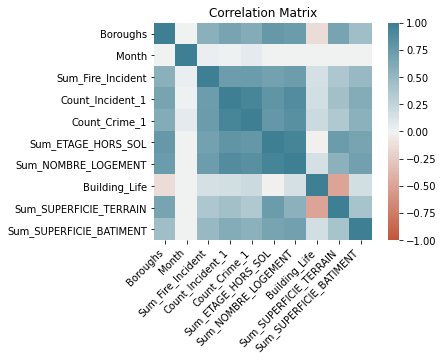

In [ ]:
#Create correlation matrix for all the features and response variable
corrMatrix = Dataset_Corr.corr()

ax = sn.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_title('Correlation Matrix')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
dataset_Predict.head()

,CODEMAMROT,Boroughs,Year,Month,Sum_NOMBRE_UNI,Sum_Fire_Incident,Count_Incident,Count_Incident_1,Count_Crime,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT
78,66007,0.000000,2021,NaN,6,0,3,0.032914,0,0.019011,0.026149,0.020492,0.618904,0.027611,0.002593
157,66032,0.030303,2021,NaN,9,0,7,0.090997,0,0.049430,0.192910,0.109243,0.976484,0.172020,0.113941
236,66047,0.060606,2021,NaN,1,0,1,0.012585,0,0.015209,0.054375,0.023087,0.757046,0.049045,0.004968
315,66058,0.090909,2021,NaN,6,1,3,0.044530,0,0.038023,0.210500,0.154800,0.223005,0.205251,0.137745
394,66062,0.121212,2021,NaN,1,0,1,0.012585,0,0.011407,0.064401,0.024475,0.430230,0.093508,0.008553


In [ ]:
dataset_Predict_New = dataset_Predict.drop(['CODEMAMROT','Year','Sum_Fire_Incident','Count_Incident','Count_Crime','Sum_NOMBRE_UNI'], axis=1)
dataset_Predict_New.head()

,Boroughs,Month,Count_Incident_1,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT
78,0.000000,NaN,0.032914,0.019011,0.026149,0.020492,0.618904,0.027611,0.002593
157,0.030303,NaN,0.090997,0.049430,0.192910,0.109243,0.976484,0.172020,0.113941
236,0.060606,NaN,0.012585,0.015209,0.054375,0.023087,0.757046,0.049045,0.004968
315,0.090909,NaN,0.044530,0.038023,0.210500,0.154800,0.223005,0.205251,0.137745
394,0.121212,NaN,0.012585,0.011407,0.064401,0.024475,0.430230,0.093508,0.008553


In [ ]:
values = 0.636364
dataset_Predict_New['Month'].fillna(value=values,inplace = True)

In [ ]:
dataset_Predict_New.head()

,Boroughs,Month,Count_Incident_1,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT
78,0.000000,0.636364,0.032914,0.019011,0.026149,0.020492,0.618904,0.027611,0.002593
157,0.030303,0.636364,0.090997,0.049430,0.192910,0.109243,0.976484,0.172020,0.113941
236,0.060606,0.636364,0.012585,0.015209,0.054375,0.023087,0.757046,0.049045,0.004968
315,0.090909,0.636364,0.044530,0.038023,0.210500,0.154800,0.223005,0.205251,0.137745
394,0.121212,0.636364,0.012585,0.011407,0.064401,0.024475,0.430230,0.093508,0.008553


**Training and testing dataset preparation**

In [ ]:
# Prepare dependent and independent variables
from sklearn.model_selection import train_test_split

X = dataset.drop(['CODEMAMROT', 'FIRE_RISK','Year','Sum_Fire_Incident','Count_Incident','Count_Crime'], axis=1)
y = dataset[['FIRE_RISK']]

In [ ]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
X_train.head()

,Boroughs,Month,Count_Incident_1,Count_Crime_1,Sum_ETAGE_HORS_SOL,Sum_NOMBRE_LOGEMENT,Building_Life,Sum_SUPERFICIE_TERRAIN,Sum_SUPERFICIE_BATIMENT
2404,0.909091,1.000000,0.157544,0.129032,0.539731,0.281953,0.195583,0.917470,0.054663
316,0.121212,0.090909,0.008876,0.008798,0.064401,0.024475,0.388205,0.093508,0.008553
1467,0.545455,0.909091,0.240385,0.243402,0.421836,0.405961,0.234530,0.435106,0.074921
1659,0.636364,0.090909,0.352071,0.190616,0.534718,0.446436,0.221649,0.405139,0.126721
167,0.060606,0.909091,0.014793,0.023460,0.054375,0.023087,0.694369,0.049045,0.004968


**Baseline Model**

In [ ]:
# Used Decision tree to build the baseline model with 3 features selected
from sklearn.tree import DecisionTreeClassifier

X_train_base = X_train.drop(['Boroughs','Count_Incident_1','Count_Crime_1','Building_Life','Sum_SUPERFICIE_TERRAIN','Sum_SUPERFICIE_BATIMENT'],axis=1)
y_train_base = y_train
X_test_base = X_test.drop(['Boroughs','Count_Incident_1','Count_Crime_1','Building_Life','Sum_SUPERFICIE_TERRAIN','Sum_SUPERFICIE_BATIMENT'],axis=1)
y_test_base = y_test

Model_base = DecisionTreeClassifier(max_depth = 3, random_state=40)
Model_base.fit(X_train_base, y_train)
y_base_pred = Model_base.predict(X_test_base)

In [ ]:
# Use different metrics to do model evaluation

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, r2_score, classification_report

print(confusion_matrix(y_test, y_base_pred))
print('\n Accuracy: ',accuracy_score(y_test, y_base_pred))
print('\n R Square Score:',r2_score(y_test, y_base_pred))
print('\n Classification Report: \n',classification_report(y_test, y_base_pred))

[[195  74   0]
 [ 43 298  18]
 [  0  71 107]]

 Accuracy:  0.7444168734491315

 R Square Score: 0.5283081582154595

 Classification Report: 
               precision    recall  f1-score   support

           1       0.82      0.72      0.77       269
           2       0.67      0.83      0.74       359
           3       0.86      0.60      0.71       178

    accuracy                           0.74       806
   macro avg       0.78      0.72      0.74       806
weighted avg       0.76      0.74      0.74       806



**Model 1: Random Forest**

In [ ]:
#Use Random forest to train the model
from sklearn.ensemble import RandomForestClassifier
Model_RF = RandomForestClassifier(max_depth=15, random_state=40)
Model_RF.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [ ]:
#Predict the fire risk based on test dataset
Model_RF_pred = Model_RF.predict(X_test)

In [ ]:
#Get the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, r2_score, classification_report
from sklearn.model_selection import cross_val_score

print(confusion_matrix(y_test, Model_RF_pred))
print('\n Accuracy: ',accuracy_score(y_test, Model_RF_pred))
print('\n R Square Score:',r2_score(y_test, Model_RF_pred))
print('\n Classification Report: \n',classification_report(y_test, Model_RF_pred))


[[217  50   2]
 [ 51 273  35]
 [  0  36 142]]

 Accuracy:  0.7841191066997518

 R Square Score: 0.5878420799940909

 Classification Report: 
               precision    recall  f1-score   support

           1       0.81      0.81      0.81       269
           2       0.76      0.76      0.76       359
           3       0.79      0.80      0.80       178

    accuracy                           0.78       806
   macro avg       0.79      0.79      0.79       806
weighted avg       0.78      0.78      0.78       806



In [ ]:
#Get the feature importance
Model_RF.feature_importances_

array([0.04022024, 0.17491783, 0.18711279, 0.16938295, 0.0982578 ,
       0.13880437, 0.11976379, 0.01604548, 0.05549476])

Text(0, 0.5, 'Features')

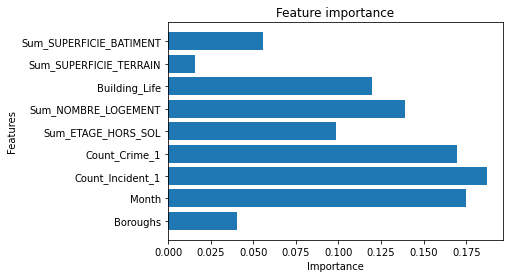

In [ ]:
#Visualize the feature importance
from matplotlib import pyplot as plt

plt.barh(features, Model_RF.feature_importances_)
plt.title('Feature importance')
plt.xlabel('Importance')
plt.ylabel('Features')

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
#Use SelectFromModel function to train the model with features considered as important
selector = SelectFromModel(estimator=RandomForestClassifier()).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [ ]:
selector.threshold_

0.1111111111111111

In [ ]:
#Transform the training dataset to the ones selected by SelectFromModel
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

In [ ]:
#Retrain the model
Model_RF_sel = RandomForestClassifier(max_depth=15,random_state=40)
Model_RF_sel.fit(X_train_sel, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [ ]:
#Predict the fire risk based on the selected features
Model_RF_pred_sel= Model_RF_sel.predict(X_test_sel)

In [ ]:
# Use different metrics to do model evaluation

print(confusion_matrix(y_test, Model_RF_pred_sel))
print('\n Accuracy: ',accuracy_score(y_test, Model_RF_pred_sel))
print('\n R Square Score:',r2_score(y_test, Model_RF_pred_sel))
print('\n Classification Report: \n',classification_report(y_test, Model_RF_pred_sel))

[[219  48   2]
 [ 56 264  39]
 [  0  32 146]]

 Accuracy:  0.7803970223325062

 R Square Score: 0.5809727813273257

 Classification Report: 
               precision    recall  f1-score   support

           1       0.80      0.81      0.81       269
           2       0.77      0.74      0.75       359
           3       0.78      0.82      0.80       178

    accuracy                           0.78       806
   macro avg       0.78      0.79      0.79       806
weighted avg       0.78      0.78      0.78       806



In [ ]:
status = selector.get_support()
print(status)

[False  True  True  True False  True  True False False]


In [ ]:
import numpy as np

features_New = np.array(features)
features_Name = features_New[status]
print(features_Name)

['Month' 'Count_Incident_1' 'Count_Crime_1' 'Sum_NOMBRE_LOGEMENT'
 'Building_Life']


In [ ]:
#Get the new feature importance
Importance = Model_RF_sel.feature_importances_
print(Importance)

[0.17489419 0.22833388 0.22516089 0.23044733 0.14116371]


Text(0, 0.5, 'Features')

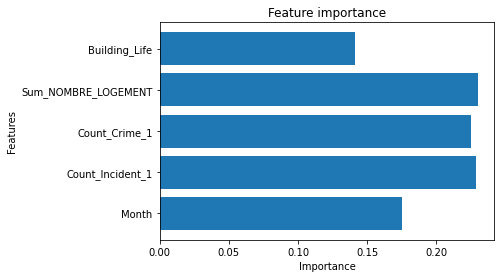

In [ ]:
plt.barh(features_Name, Importance)
plt.title('Feature importance')
plt.xlabel('Importance')
plt.ylabel('Features')

**Model 2: Support Vector Machine**

In [ ]:
# Train SVM model

from sklearn import svm

Model_SVM=svm.SVC(kernel='linear',C=1,decision_function_shape='ovo')
Model_SVM.fit(X_train, y_train)
Model_SVM_pred = Model_SVM.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Use different metrics to do model evaluation

print(confusion_matrix(y_test, Model_SVM_pred))
print('\n Accuracy: ',accuracy_score(y_test, Model_SVM_pred))
print('\n R Square Score:',r2_score(y_test, Model_SVM_pred))
print('\n Classification Report: \n',classification_report(y_test, Model_SVM_pred))

[[221  48   0]
 [ 94 221  44]
 [  0  59 119]]

 Accuracy:  0.6960297766749379

 R Square Score: 0.4390072755475125

 Classification Report: 
               precision    recall  f1-score   support

           1       0.70      0.82      0.76       269
           2       0.67      0.62      0.64       359
           3       0.73      0.67      0.70       178

    accuracy                           0.70       806
   macro avg       0.70      0.70      0.70       806
weighted avg       0.70      0.70      0.69       806



In [ ]:
#Get the feature importance
Model_SVM.coef_

array([[ 0.61669055, -0.06936164, -2.53964997, -2.96938063, -2.63001102,
        -4.20522183, -0.10587591,  0.0572213 , -1.23111855],
       [-1.86770541,  0.00518929, -1.32939187, -1.60930202, -2.12351322,
        -4.0681456 , -0.65203766,  0.7415953 , -0.44648916],
       [-0.66079713, -0.03350172, -0.2800346 , -2.14013159, -1.36801715,
        -0.60602847, -1.18725715, -0.16404946, -0.57314244]])

Text(0, 0.5, 'Features')

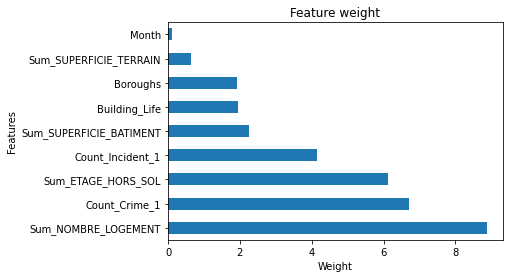

In [ ]:
# Plot the feature importance

pd.Series(abs(Model_SVM.coef_.sum(axis=0)), index=features).nlargest(10).plot(kind='barh')
plt.title('Feature weight')
plt.xlabel('Weight')
plt.ylabel('Features')

In [ ]:
# Drop irrelevant features

X_train_SVM = X_train.drop(['Month','Boroughs','Building_Life','Sum_SUPERFICIE_TERRAIN','Sum_SUPERFICIE_BATIMENT'], axis=1)
y_train_SVM = y_train

X_test_SVM = X_test.drop(['Month','Boroughs','Building_Life','Sum_SUPERFICIE_TERRAIN','Sum_SUPERFICIE_BATIMENT'], axis=1)
y_test_SVM = y_test


In [ ]:
# Retrain the model with important features

Model_SVM_sel=svm.SVC(kernel='linear',C=1,decision_function_shape='ovo')
Model_SVM_sel.fit(X_train_SVM, y_train_SVM)
Model_SVM_pred_sel = Model_SVM_sel.predict(X_test_SVM)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Use different metrics to do model evaluation

print(confusion_matrix(y_test_SVM, Model_SVM_pred_sel))
print('\n Accuracy: ',accuracy_score(y_test_SVM, Model_SVM_pred_sel))
print('\n R Square Score:',r2_score(y_test_SVM, Model_SVM_pred_sel))
print('\n Classification Report: \n',classification_report(y_test_SVM, Model_SVM_pred_sel))

[[243  26   0]
 [110 201  48]
 [  0  57 121]]

 Accuracy:  0.7009925558312655

 R Square Score: 0.4481663404365327

 Classification Report: 
               precision    recall  f1-score   support

           1       0.69      0.90      0.78       269
           2       0.71      0.56      0.63       359
           3       0.72      0.68      0.70       178

    accuracy                           0.70       806
   macro avg       0.70      0.71      0.70       806
weighted avg       0.70      0.70      0.69       806



In [ ]:
#Get the feature importance
Model_SVM_sel.coef_

array([[-2.27457048, -2.96660554, -2.35667835, -3.46667603],
       [-1.33542885, -1.42628876, -1.34352219, -4.57744826],
       [-0.116577  , -2.82878232, -1.4544614 , -1.38983488]])

**Model 3: KNN**

In [ ]:
# Train KNN model

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train,y_train)

KNN = neigh.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
# Use different metrics to do model evaluation

print(confusion_matrix(y_test, KNN))
print('\n Accuracy: ',accuracy_score(y_test, KNN))
print('\n R Square Score:',r2_score(y_test, KNN))
print('\n Classification Report: \n',classification_report(y_test, KNN))

[[218  49   2]
 [ 65 271  23]
 [  0  41 137]]

 Accuracy:  0.7766749379652605

 R Square Score: 0.5741034826605605

 Classification Report: 
               precision    recall  f1-score   support

           1       0.77      0.81      0.79       269
           2       0.75      0.75      0.75       359
           3       0.85      0.77      0.81       178

    accuracy                           0.78       806
   macro avg       0.79      0.78      0.78       806
weighted avg       0.78      0.78      0.78       806



In [ ]:
# Give a range of values for all the parameters

leaf_size = list(range(1,20))
n_neighbors = list(range(1,20))
p = [1,2]

In [ ]:
# Use GridSearchCV to select the parameters which can provide the best performance of the model

from sklearn.model_selection import GridSearchCV

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
KNN_2 = KNeighborsClassifier()
clf = GridSearchCV(KNN_2, hyperparameters, cv=10)
best_model_KNN = clf.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataC

In [ ]:
# Get the value of the parameters

print('Best leaf_size:', best_model_KNN.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_KNN.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_KNN.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 11


In [ ]:
# Retrain the model with new parameters selected

neigh_New = KNeighborsClassifier(leaf_size=1, p=1, n_neighbors=11)
neigh_New.fit(X_train,y_train)

KNN_New = neigh_New.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
# Use different metrics to do model evaluation

print(confusion_matrix(y_test, KNN_New))
print('\n Accuracy: ',accuracy_score(y_test, KNN_New))
print('\n R Square Score:',r2_score(y_test, KNN_New))
print('\n Classification Report: \n',classification_report(y_test, KNN_New))

[[209  58   2]
 [ 48 281  30]
 [  0  36 142]]

 Accuracy:  0.7841191066997518

 R Square Score: 0.5878420799940909

 Classification Report: 
               precision    recall  f1-score   support

           1       0.81      0.78      0.79       269
           2       0.75      0.78      0.77       359
           3       0.82      0.80      0.81       178

    accuracy                           0.78       806
   macro avg       0.79      0.79      0.79       806
weighted avg       0.79      0.78      0.78       806



**Model 4: X-GBoost**

In [ ]:
# Train XGBoost model

import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = xgb.XGBClassifier(objective="multi:softmax",random_state=40)
xgb_model.fit(X_train,y_train)

y_pred_xgb = xgb_model.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Use different metrics to do model evaluation

print(confusion_matrix(y_test, y_pred_xgb))
print('\n Accuracy: ',accuracy_score(y_test, y_pred_xgb))
print('\n R Square Score:',r2_score(y_test, y_pred_xgb))
print('\n Classification Report: \n',classification_report(y_test, y_pred_xgb))

[[215  52   2]
 [ 53 275  31]
 [  0  29 149]]

 Accuracy:  0.792803970223325

 R Square Score: 0.6038704435498762

 Classification Report: 
               precision    recall  f1-score   support

           1       0.80      0.80      0.80       269
           2       0.77      0.77      0.77       359
           3       0.82      0.84      0.83       178

    accuracy                           0.79       806
   macro avg       0.80      0.80      0.80       806
weighted avg       0.79      0.79      0.79       806



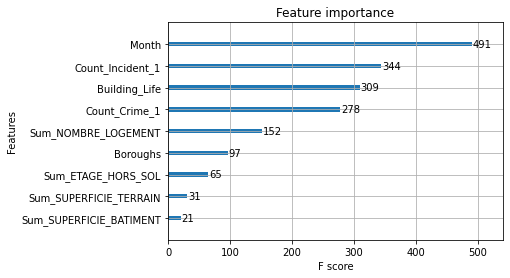

In [ ]:
# Plot the feature importance

xgb.plot_importance(xgb_model)

In [ ]:
xgb_model.feature_importances_

array([0.08619543, 0.05991078, 0.03616194, 0.05866568, 0.28186375,
       0.42092168, 0.01850628, 0.02166225, 0.01611213], dtype=float32)

In [ ]:
# Select the best threshold and features to get the best performance

from numpy import sort
from xgboost import XGBClassifier

thresholds = sort(xgb_model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.016, n=9, Accuracy: 79.28%


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.019, n=8, Accuracy: 79.03%


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.022, n=7, Accuracy: 80.52%


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.036, n=6, Accuracy: 79.90%


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.059, n=5, Accuracy: 80.02%


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thresh=0.060, n=4, Accuracy: 80.65%
Thresh=0.086, n=3, Accuracy: 71.22%


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Thresh=0.282, n=2, Accuracy: 72.21%
Thresh=0.421, n=1, Accuracy: 71.59%


In [ ]:
selection = SelectFromModel(xgb_model, threshold=0.019, norm_order=8, prefit=True)
select_X_train = selection.transform(X_train)
	# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
	# eval model
select_X_test = selection.transform(X_test)
predictions_XGB = selection_model.predict(select_X_test)
accuracy = accuracy_score(y_test, predictions_XGB)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Use different metrics to do model evaluation

print(confusion_matrix(y_test, predictions_XGB))
print('\n Accuracy: ',accuracy_score(y_test, predictions_XGB))
print('\n R Square Score:',r2_score(y_test, predictions_XGB))
print('\n Classification Report: \n',classification_report(y_test, predictions_XGB))

[[215  52   2]
 [ 47 285  27]
 [  0  29 149]]

 Accuracy:  0.8052109181141439

 R Square Score: 0.6267681057724267

 Classification Report: 
               precision    recall  f1-score   support

           1       0.82      0.80      0.81       269
           2       0.78      0.79      0.79       359
           3       0.84      0.84      0.84       178

    accuracy                           0.81       806
   macro avg       0.81      0.81      0.81       806
weighted avg       0.81      0.81      0.81       806



In [ ]:
# Get new feature importance

selection_model.feature_importances_

array([0.08284725, 0.07526255, 0.04158844, 0.06272415, 0.22731955,
       0.4658102 , 0.04444794], dtype=float32)

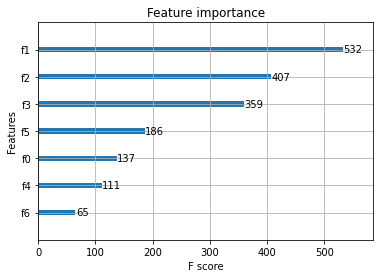

In [ ]:
# Plot the new feature importance

xgb.plot_importance(selection_model)

**Prediction for 2021 Sep**

Since the best model we have is XGBoost with selected 7 features, so we will use this one to do the preodiction for fire risk in 2021 Sep.

In [ ]:
select_X_Pred = selection.transform(dataset_Predict_New)

In [ ]:
# Do prediction with XGBoost model

Model_XGB_Future_Predict = selection_model.predict(select_X_Pred)

In [ ]:
# Get the prediction result

Model_XGB_Future_Predict

array([1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3])

In [ ]:
# Create a new dataframe which contains prediction result

Output_2021_09 = pd.DataFrame({'Boroughs': unique_boroughs,'Year': 2021, 'Month': 9,'FIRE_RISK':Model_XGB_Future_Predict})

In [ ]:
Output_2021_09

,Boroughs,Year,Month,FIRE_RISK
0,Montréal-Est,2021,9,1
1,Westmount,2021,9,2
2,Montréal-Ouest,2021,9,1
3,Côte-Saint-Luc,2021,9,2
4,Hampstead,2021,9,1
5,Mont-Royal,2021,9,2
6,Dorval,2021,9,2
7,L'Île-Dorval,2021,9,1
8,Pointe-Claire,2021,9,2
9,Kirkland,2021,9,1


In [ ]:
dataset_Comp.head()

,Boroughs,Year,Month,FIRE_RISK
67,Montréal-Est,2020,9,1
146,Westmount,2020,9,1
225,Montréal-Ouest,2020,9,1
304,Côte-Saint-Luc,2020,9,2
383,Hampstead,2020,9,1


In [ ]:
# Combine Sep 2020 and Sep 2021 data into one dataset

Frame = [dataset_2021,Output_2021_09,dataset_Comp]
Output = pd.concat(Frame)

In [ ]:
# Export the output file to csv

Output.to_csv (root_path+'export_dataframe.csv', index = False, header=True)